In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# En cada momento tendremos un vector de la distribución de la población
# (sanos, sintomas leves, sintomas graves, recuperados, fallecidos)
# En abreviación
# (S,L,G,R,F)

# Población inicial
x_0=(100000,0,0,0,0)

In [3]:
# Escenario 1, donde se pasa de sano a síntomas leves con probabilidad 0.05

# Definimos las probabilidades de transición

S_L = 0.30
L_G = 0.10
L_R = 0.20
G_R = 0.10
G_F = 0.10

# Definimos la matriz A
A=np.array([[1-S_L,0,0,0,0],[S_L,1-L_G-L_R,0,0,0],[0,L_G,1-G_R-G_F,0,0],[0,L_R,G_R,1,0],[0,0,G_F,0,1]])

# Encontramos la evolución de la epidemia los primeros 60 días
evolution=[x_0]
for j in range(60):
    evolution.append(np.matmul(A,evolution[-1]))
for j in range(1,4):
    print(evolution[j])

[70000. 30000.     0.     0.     0.]
[49000. 42000.  3000.  6000.     0.]
[34300. 44100.  6600. 14700.   300.]


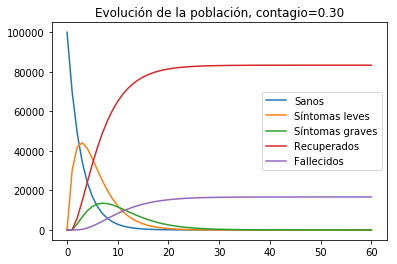

In [4]:
# Hacemos gráfica para mostrar la evolución de todo el tiempo
plt.plot([j[0] for j in evolution], label="Sanos")
plt.plot([j[1] for j in evolution], label="Síntomas leves")
plt.plot([j[2] for j in evolution], label="Síntomas graves")
plt.plot([j[3] for j in evolution], label="Recuperados")
plt.plot([j[4] for j in evolution], label="Fallecidos")
plt.title("Evolución de la población, contagio=0.30")
plt.legend()
plt.show()

In [5]:
#Mostramos recuperados y fallecidos al último día
print(evolution[-1][3])
print(evolution[-1][4])

83333.10305742307
16666.437295519096


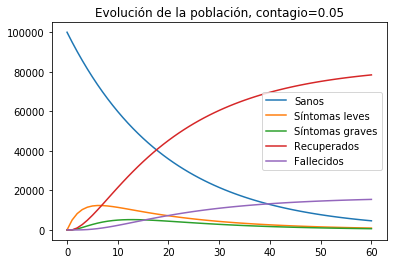

In [6]:
# Escenario 2. Definimos las probabilidades de transición, que son iguales,
# salvo que ahora la tasa de contagio es menor, y por lo tanto S_L es menor.

S_L = 0.05
L_G = 0.10
L_R = 0.20
G_R = 0.10
G_F = 0.10

# Definimos la matriz A
A=np.array([[1-S_L,0,0,0,0],[S_L,1-L_G-L_R,0,0,0],[0,L_G,1-G_R-G_F,0,0],[0,L_R,G_R,1,0],[0,0,G_F,0,1]])

evolution2=[x_0]
for j in range(60):
    evolution2.append(np.matmul(A,evolution2[-1]))

plt.plot([j[0] for j in evolution2], label="Sanos")
plt.plot([j[1] for j in evolution2], label="Síntomas leves")
plt.plot([j[2] for j in evolution2], label="Síntomas graves")
plt.plot([j[3] for j in evolution2], label="Recuperados")
plt.plot([j[4] for j in evolution2], label="Fallecidos")
plt.title("Evolución de la población, contagio=0.05")
plt.legend()
plt.show()

In [7]:
# Comparamos los escenarios de fallecidos al día 30 y al día 60

print("Número de fallecidos")

print("Al día 60, contagio alto")
print(evolution[-1][4])

print("Al día 60, contagio bajo")
print(evolution2[-1][4])

print("Al día 30, contagio alto")
print(evolution[30][4])

print("Al día 30, contagio bajo")
print(evolution2[30][4])

Número de fallecidos
Al día 60, contagio alto
16666.437295519096
Al día 60, contagio bajo
15438.164231886809
Al día 30, contagio alto
16493.640623413394
Al día 30, contagio bajo
10963.448366574485


[]

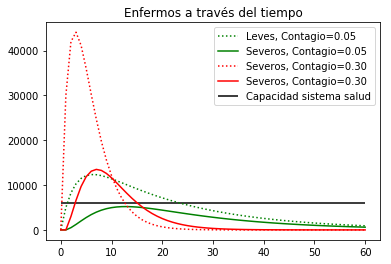

In [8]:
plt.plot([j[1] for j in evolution2], color="green", linestyle=":", label="Leves, Contagio=0.05")
plt.plot([j[2] for j in evolution2], color="green", label="Severos, Contagio=0.05")
plt.plot([j[1] for j in evolution], color="red", linestyle=":", label="Severos, Contagio=0.30")
plt.plot([j[2] for j in evolution], color="red", label="Severos, Contagio=0.30")
plt.hlines(6000,0,60, color="black", label="Capacidad sistema salud")
plt.title("Enfermos a través del tiempo")
plt.legend()
plt.plot()

[]

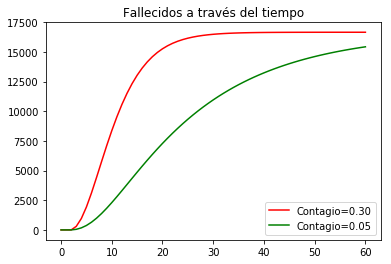

In [9]:
plt.plot([j[4] for j in evolution], color="red", label="Contagio=0.30")
plt.plot([j[4] for j in evolution2], color="green", label="Contagio=0.05")
# plt.hlines(40000,0,60, color="red", label="Sistema salud")
plt.title("Fallecidos a través del tiempo")
plt.legend()
plt.plot()